#Arboles de desición (load_iris)
## 1. Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt    #generar graficos
from sklearn.model_selection import train_test_split  #separar los datos (train y test)
from sklearn.tree import DecisionTreeClassifier       #clase que arboles de desición
from sklearn.datasets import load_iris


## 2. Cargando datos (dataset)

In [2]:
db_iris =load_iris()

##3. Explorando /conociendo los datos

In [3]:
#visualizando la descripción
print(db_iris.DESCR)
#visualizar target (caracteristica más importante)
print(db_iris.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##4. convertir dataset en un dataframe (pandas)

In [4]:
#creamos un dataframe
df_iris= pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target']=db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##5. Dividiendo datos (split) train vs test

In [6]:
# split (75%- train , 25%-test),test_size=0.4 (60%-train, 40%-test)
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[db_iris.feature_names],df_iris['target'], random_state=4)


##6. Instanciar un árbol de desición

In [7]:
arbol = DecisionTreeClassifier(max_depth=3, random_state=0)

##7. Entrenar modelo (con algoritmo de árbol de clasificación)

In [8]:
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## 8. Usar datos de test(25%) para probar el modelo.

In [9]:
print(X_test.iloc[0:10])
print(Y_test.iloc[0:10])
#arbol.predict(X_test.iloc[0:10].values.reshape(1,-1))
arbol.predict(X_test.iloc[0:10])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
128                6.4               2.8                5.6               2.1
18                 5.7               3.8                1.7               0.3
130                7.4               2.8                6.1               1.9
105                7.6               3.0                6.6               2.1
107                7.3               2.9                6.3               1.8
78                 6.0               2.9                4.5               1.5
83                 6.0               2.7                5.1               1.6
14                 5.8               4.0                1.2               0.2
5                  5.4               3.9                1.7               0.4
133                6.3               2.8                5.1               1.5
128    2
18     0
130    2
105    2
107    2
78     1
83     1
14     0
5      0
133    2
Name: target, dtype: int64


array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2])

## 9. Calcular la presición del modelo (accuracy)

In [11]:
accuracy= arbol.score(X_test,Y_test)
print(accuracy)

0.9736842105263158


##10. Graficando el arbol (imagen)

In [13]:
#0-setosa , 1-versicolor, 2-virginica
class_name_list= list(['setosa','versicolor','verginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol, feature_names=db_iris.feature_names, class_names=class_name_list)
grafico = graph_from_dot_data(dot_data)
grafico.write_png('arbol_iris.png')

True

## 11. Caracteristicas relevantes para el modelo

In [14]:
df_importancia = pd.DataFrame({'caracteristica':X_train.columns,'Importancia':arbol.feature_importances_})
df_importancia= df_importancia.sort_values('Importancia',ascending=False)
df_importancia.head()

,caracteristica,Importancia
3,petal width (cm),0.935947
2,petal length (cm),0.064053
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


## 12. Probar arbol con diferentes profundidades

In [15]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,6))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=42)
  arbol.fit(X_train,Y_train)
  score= arbol.score(X_test,Y_test)
  accuracy_list.append(score)

## Grafico de resultados

<function matplotlib.pyplot.show>

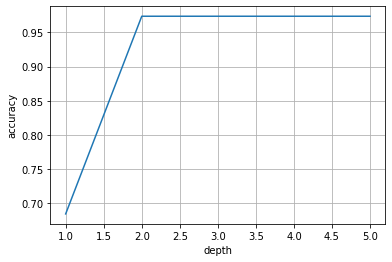

In [16]:
plt.plot (depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

#Árbol de clasificación (dataset Titanic)
##Importando librerias

In [17]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Cargando dataset

In [18]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Conociendo los datos

In [19]:
#nombres de columnas
df_titanic.columns
#mostrar estadisticas del dataset
df_titanic.describe()
#conocer valores nulos
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Graficando datos

0    0.616162
1    0.383838
Name: Survived, dtype: float64


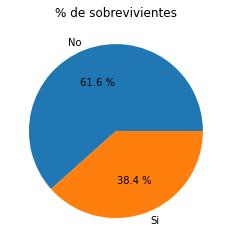

In [20]:
#grafica de torta para sobrevivientes (si/no)
datos = df_titanic.Survived.value_counts(normalize=True)
print(datos)
plt.pie(datos, labels=["No","Si"],autopct="%0.1f %%")
plt.title("% de sobrevivientes")
plt.show()

female    0.681287
male      0.318713
Name: Sex, dtype: float64


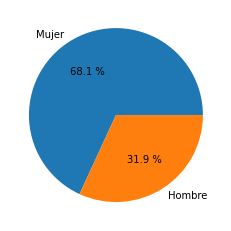

In [21]:
#sobrevivientes vs sexo (Male / Female)
datos= df_titanic.Sex[df_titanic.Survived==1].value_counts(normalize=True)
print(datos)
plt.pie(datos,labels=["Mujer","Hombre"],autopct="%0.1f %%")
plt.show()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


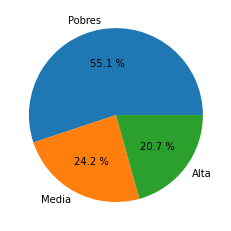

In [22]:
#sobrevivientes por clase (3, 2,1)
#datos= df_titanic.Pclass[df_titanic.Survived==1].value_counts(normalize=True)
datos = df_titanic.Pclass.value_counts(normalize=True)
print(datos)
plt.pie(datos,labels=["Pobres","Media","Alta"],autopct="%0.1f %%")
plt.show()

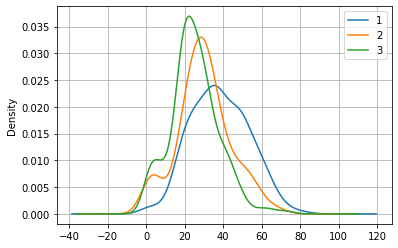

In [23]:
# clases vs edad
for t_class in [1,2,3] :
  df_titanic.Age[df_titanic.Pclass==t_class].plot(kind="kde")
plt.legend({"1","2","3"})
plt.grid()
plt.show()

Mejoramos El dataset

In [24]:
df_titanic.drop(['Cabin','PassengerId','Name','Ticket','Embarked '], axis=1,inplace=True)
df_titanic.dropna(inplace=True)
df_titanic.head()
#df_titanic.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [25]:
from sklearn import preprocessing    #clase que permite hacer ETL 
#cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le =preprocessing.LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])

In [26]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [27]:
df_titanic.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [28]:
df_titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708
10,1,3,0,4.0,1,1,16.7000


## Instanciar el árbol

In [30]:
#arbol = DecisionTreeClassifier()
arbol = DecisionTreeClassifier(max_depth=5, random_state=4)

## Separar datos de X y Y y entrenar

*   X= (Pclass + Sex +Age +Sibsp + Parch + Fare)
*   y= survived





In [31]:
X= df_titanic[["Pclass","Sex","Age","SibSp","Parch"]]
Y= df_titanic['Survived']
#train y test, random_state=number --> estraer siempre los mismo datos en el entrenamiento (capacitación)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

## Predicciónes

In [33]:
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
#calcular la exactitud
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
#overfitting 
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.8637274549098196
Accuracy of test: %0.8093023255813954
Accuracy Global %0.8093023255813954


## Graficando el árbol

In [34]:
#clases para graficar
classs_name_list= list(["dead","live"])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data= export_graphviz(arbol, feature_names=["Pclass","Sex","Age","SibSp","Parch"],class_names=classs_name_list)
graphic= graph_from_dot_data(dot_data)
graphic.write_png("arbol_titanic_v3.png")

True

Probar árbol con diferentes profundidades

In [36]:
#lista_de_profundidades (1-10)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=42)
  arbol.fit(X_train,Y_train)
  score= arbol.score(X_test,Y_test)
  accuracy_list.append(score)

## Gráfico de resultados

<function matplotlib.pyplot.show>

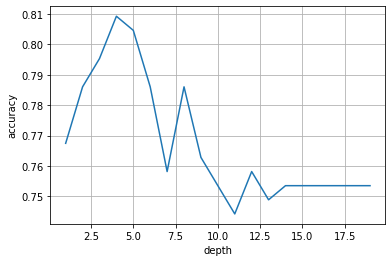

In [37]:
plt.plot (depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show